In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/Krunal Patel/Downloads/Social_Network_Ads.csv')

In [3]:
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})

In [4]:
X = data.iloc[:,1:-1]

In [5]:
print(data)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       0   19            19000          0
1    15810944       0   35            20000          0
2    15668575       1   26            43000          0
3    15603246       1   27            57000          0
4    15804002       0   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       1   46            41000          1
396  15706071       0   51            23000          1
397  15654296       1   50            20000          1
398  15755018       0   36            33000          0
399  15594041       1   49            36000          1

[400 rows x 5 columns]


In [6]:
Y = data.iloc[:,-1]

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [22]:
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

array([[-1.03390789, -0.37193176, -0.79711783],
       [ 0.96720415,  1.82464096, -1.28799739],
       [-1.03390789, -1.13595705, -1.17249632],
       ...,
       [-1.03390789,  1.82464096, -0.30623826],
       [-1.03390789, -1.42246653, -0.21961246],
       [ 0.96720415, -0.94495073, -0.45061461]])

In [25]:
classifier = LogisticRegression(solver='lbfgs')

In [26]:
param = {'penalty' : ['l1', 'l2'], 'C' : [1,2,3,4,5,10,20,30,40], 'max_iter' : [100, 200, 300]}
classReg = GridSearchCV(classifier, param_grid = param, scoring = 'accuracy', cv = 5)

In [27]:
classReg.fit(X_train, Y_train)

c:\Users\Krunal Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Krunal Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Krunal Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 10, 20, 30, 40],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [28]:
print(classReg.best_score_)

0.8444444444444444


In [29]:
Y_predicted = classReg.predict(X_test)

In [32]:
print(classification_report(Y_test, Y_predicted))
#Confusion matrix
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        30
           1       0.70      0.70      0.70        10

    accuracy                           0.85        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.85      0.85      0.85        40

[[27  3]
 [ 3  7]]


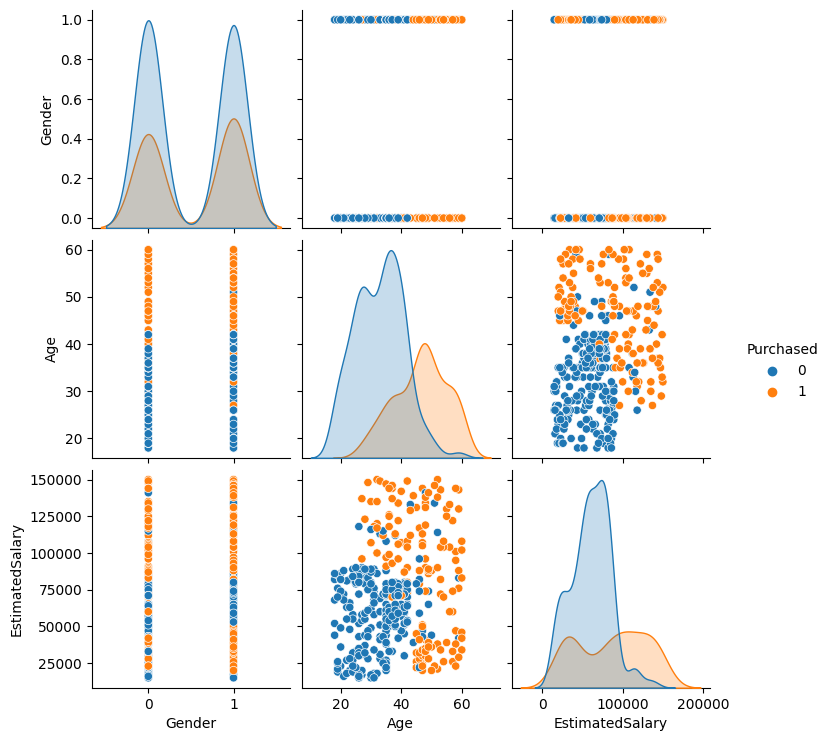

In [14]:
data1 = data.iloc[:,1:]
sns.pairplot(data1, hue='Purchased')

Question 2

In [15]:
data = sns.load_dataset('iris')

In [16]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
X = data.iloc[:,:-1]
Y = data['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

<AxesSubplot: xlabel='sepal_length', ylabel='Density'>

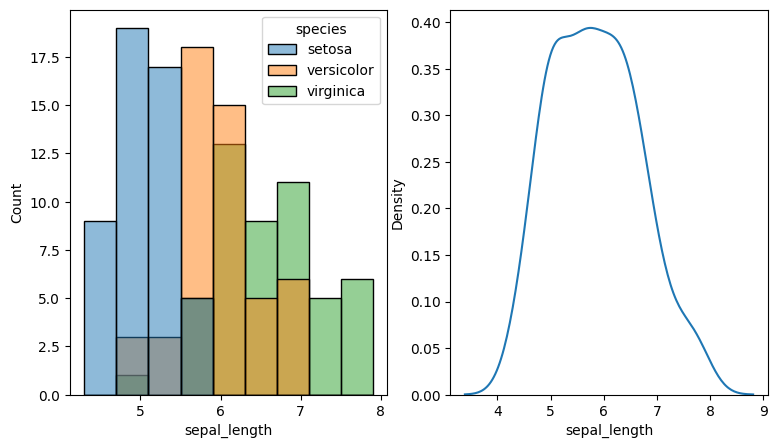

In [18]:
#First-Feature
f,axes = plt.subplots(1, 2, figsize=(9,5))
sns.histplot(data=data,x="sepal_length", hue='species', ax=axes[0])
sns.kdeplot(data['sepal_length'], ax=axes[1])

<AxesSubplot: xlabel='sepal_width', ylabel='Density'>

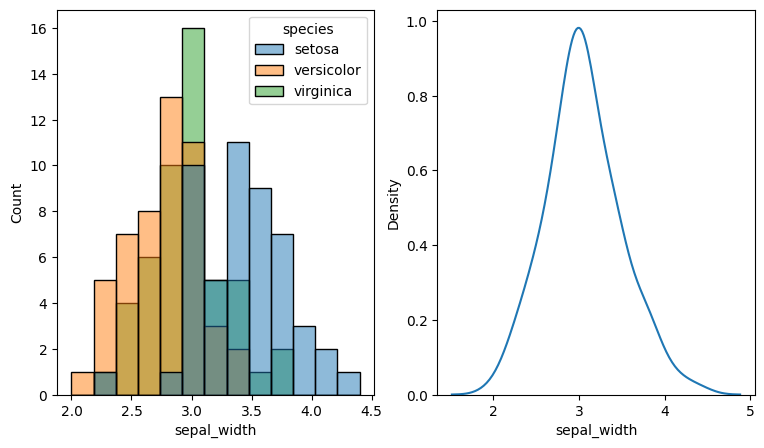

In [19]:
#2nd-Feature
f,axes = plt.subplots(1, 2, figsize=(9,5))
sns.histplot(data=data,x="sepal_width", hue='species', ax=axes[0])
sns.kdeplot(data['sepal_width'],ax=axes[1])

<AxesSubplot: xlabel='petal_length', ylabel='Density'>

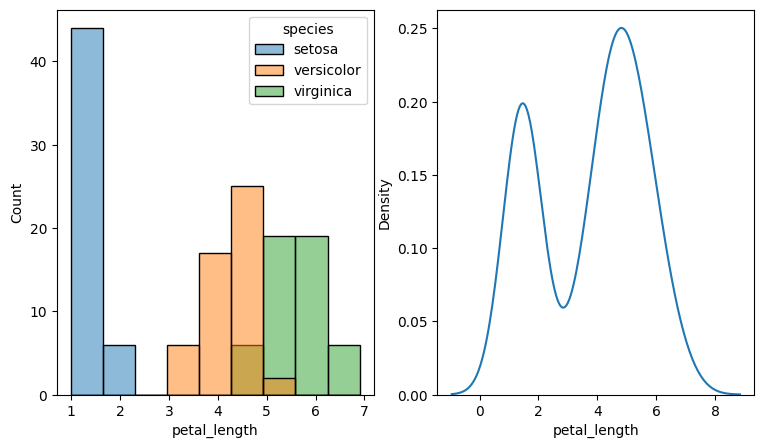

In [20]:
#3rd-Feature
f,axes = plt.subplots(1, 2, figsize=(9,5))
sns.histplot(data=data,x="petal_length", hue='species', ax=axes[0])
sns.kdeplot(data['petal_length'],ax=axes[1])

<AxesSubplot: xlabel='petal_width', ylabel='Density'>

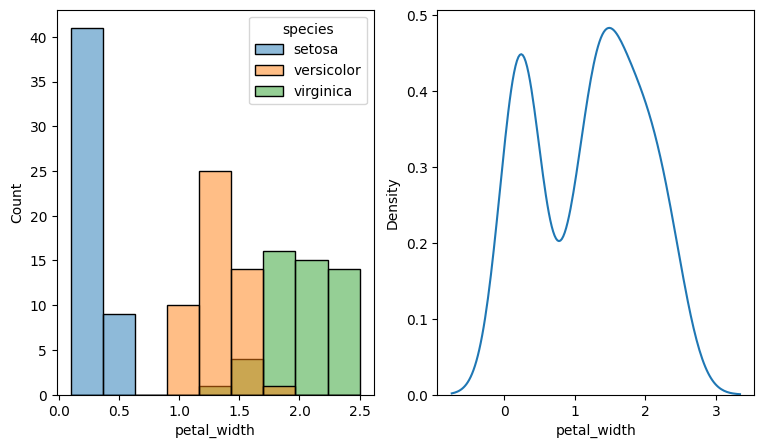

In [21]:
#4th-Feature
f,axes = plt.subplots(1, 2, figsize=(9,5))
sns.histplot(data=data,x="petal_width", hue='species',ax=axes[0])
sns.kdeplot(data['petal_width'],ax=axes[1])

In [22]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


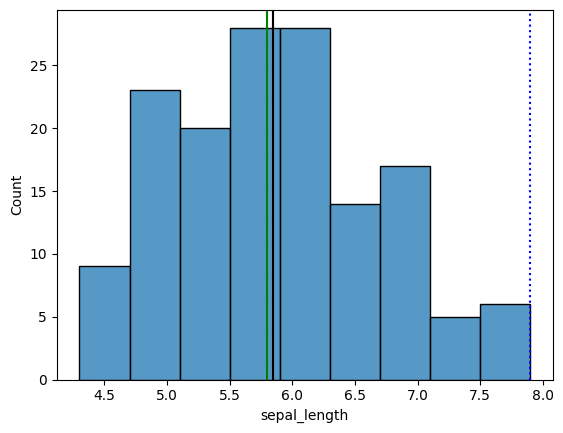

In [23]:
#For sepal_length 
mean = data['sepal_length'].mean()
median = data['sepal_length'].median()
maxx = data['sepal_length'].max()
minn = data['sepal_length'].min()
sns.histplot(data=data, x='sepal_length')
plt.axvline(mean, color='r', linestyle='--', label='Mean')
plt.axvline(median, color='g', linestyle='-', label='Median')
plt.axvline(maxx, color='b', linestyle=':', label='Max')
plt.axvline(mean, color='black', linestyle='solid', label='Min')


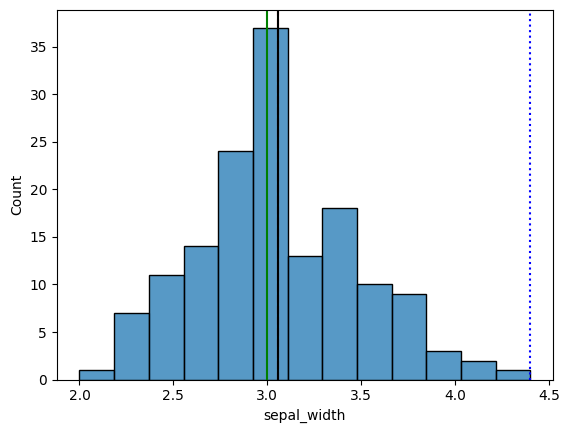

In [24]:
#For Sepal Width
mean = data['sepal_width'].mean()
median = data['sepal_width'].median()
maxx = data['sepal_width'].max()
minn = data['sepal_width'].min()
sns.histplot(data=data, x='sepal_width')
plt.axvline(mean, color='r', linestyle='--', label='Mean')
plt.axvline(median, color='g', linestyle='-', label='Median')
plt.axvline(maxx, color='b', linestyle=':', label='Max')
plt.axvline(mean, color='black', linestyle='solid', label='Min')

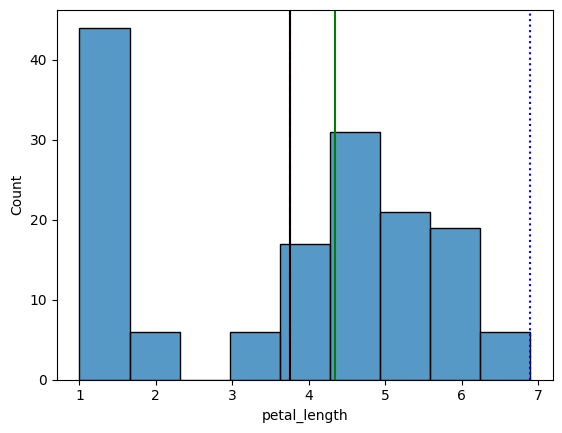

In [25]:
#For petal length
mean = data['petal_length'].mean()
median = data['petal_length'].median()
maxx = data['petal_length'].max()
minn = data['petal_length'].min()
sns.histplot(data=data, x='petal_length')
plt.axvline(mean, color='r', linestyle='--', label='Mean')
plt.axvline(median, color='g', linestyle='-', label='Median')
plt.axvline(maxx, color='b', linestyle=':', label='Max')
plt.axvline(mean, color='black', linestyle='solid', label='Min')

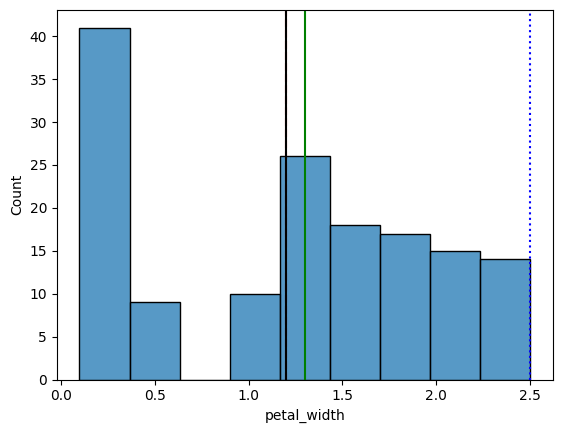

In [26]:
#For petal width
mean = data['petal_width'].mean()
median = data['petal_width'].median()
maxx = data['petal_width'].max()
minn = data['petal_width'].min()
sns.histplot(data=data, x='petal_width')
plt.axvline(mean, color='r', linestyle='--', label='Mean')
plt.axvline(median, color='g', linestyle='-', label='Median')
plt.axvline(maxx, color='b', linestyle=':', label='Max')
plt.axvline(mean, color='black', linestyle='solid', label='Min')

Question 3

In [27]:
data['species'] = data['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

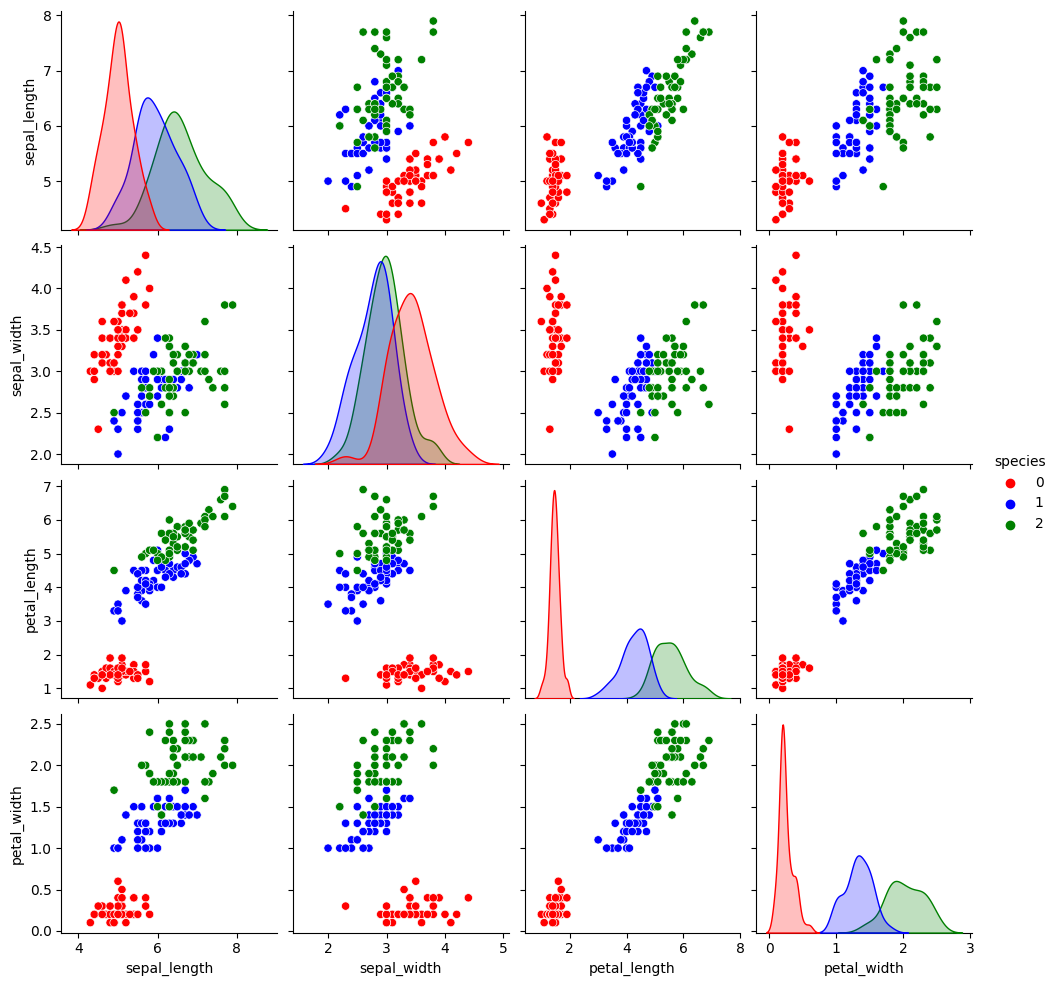

In [29]:
sns.pairplot(data, hue='species', palette=['red', 'blue', 'green'])

Question 4

In [35]:
X = data.iloc[:,:4]
Y = data.iloc[:,-1]

In [38]:
classifier = LogisticRegression()
param = {'penalty' : ['l1', 'l2'], 'C' : [1,2,3,4,5,10,20,30,40], 'max_iter' : [100, 200, 300]}
classReg = GridSearchCV(classifier, param_grid = param, scoring = 'accuracy', cv = 5)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)
classReg.fit(X_train,Y_train)

c:\Users\Krunal Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Krunal Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 10, 20, 30, 40],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [42]:
Y_pred = classReg.predict(X_test)
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.91      1.00      0.95        10
           2       1.00      0.93      0.97        15

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



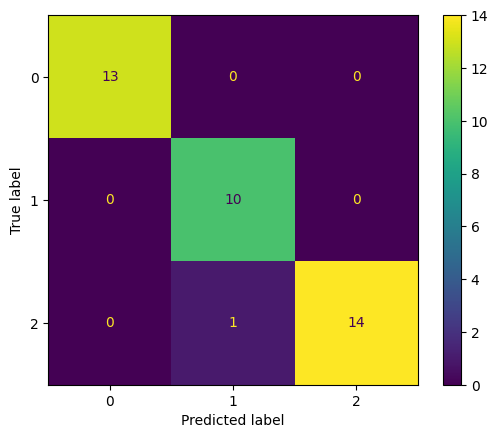

In [46]:
cm = confusion_matrix(Y_pred, Y_test)
cm_display = ConfusionMatrixDisplay(cm).plot()